In [2]:
# Import library pengolahan data
import pandas as pd
import numpy as np

# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library waktu (untuk mengukur kecepatan)
import time

# Konfigurasi agar grafik muncul rapi
%matplotlib inline
sns.set_style("whitegrid")

print("Library berhasil di-import!")

Library berhasil di-import!


In [3]:
nama_file = 'IMDB Dataset.csv' 

try:
    # Membaca data
    df = pd.read_csv(nama_file)
    
    # Menampilkan 5 baris pertama
    print(f"Berhasil membaca data! Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
    display(df.head())
    
except FileNotFoundError:
    print(f"Error: File '{nama_file}' tidak ditemukan. Pastikan file ada di folder yang sama dengan notebook ini.")

Berhasil membaca data! Jumlah baris: 50000, Jumlah kolom: 2


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Jumlah data per sentimen:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


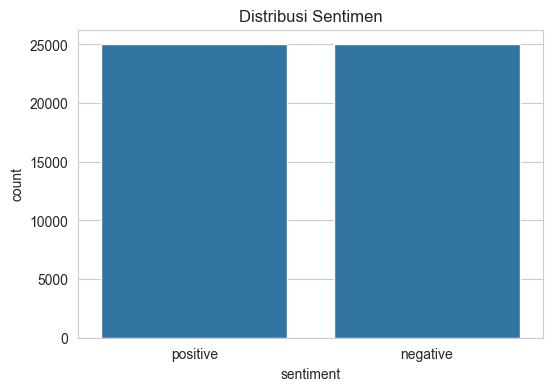

Label berhasil diubah:


,sentiment,label
0,positive,1
1,positive,1
2,positive,1
3,negative,0
4,positive,1


In [4]:
# 1. Cek apakah datanya seimbang (25k positif vs 25k negatif)?
print("Jumlah data per sentimen:")
print(df['sentiment'].value_counts())

# 2. Visualisasi Grafik Batang
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title("Distribusi Sentimen")
plt.show()

# 3. Ubah Label: positive -> 1, negative -> 0
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Tampilkan hasilnya
print("Label berhasil diubah:")
display(df[['sentiment', 'label']].head())

In [5]:
import re  # Import modul Regex untuk pencarian pola teks

def clean_text(text):
    # Hapus tag HTML (seperti <br />, <div>)
    text = re.sub(r'<.*?>', '', text)
    
    # Hapus karakter selain huruf (angka dan tanda baca dihapus)
    # Pola [^a-zA-Z\s] artinya: "Kecuali huruf a-z dan spasi, hapus sisanya"
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Ubah menjadi huruf kecil semua (Lowercase)
    text = text.lower()
    
    return text

print("Sedang membersihkan 50.000 ulasan... (Tunggu sebentar)")
# Terapkan fungsi pembersih ke seluruh kolom 'review'
df['cleaned_text'] = df['review'].apply(clean_text)

print("Selesai! Bandingkan teks asli dan teks bersih:")
display(df[['review', 'cleaned_text']].head())

Sedang membersihkan 50.000 ulasan... (Tunggu sebentar)
Selesai! Bandingkan teks asli dan teks bersih:


,review,cleaned_text
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...


In [6]:
from sklearn.model_selection import train_test_split

# X adalah soal (teks ulasan bersih), y adalah kunci jawaban (label 1/0)
X = df['cleaned_text']
y = df['label']

# Bagi data: 80% Training, 20% Testing
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data Latih: {X_train_raw.shape[0]} ulasan")
print(f"Data Uji  : {X_test_raw.shape[0]} ulasan")

Data Latih: 40000 ulasan
Data Uji  : 10000 ulasan


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF (Maksimal 5000 kata unik)
tfidf = TfidfVectorizer(max_features=5000)

print("Sedang mengubah teks menjadi angka... (Vektorisasi)")

# Fit (pelajari kosakata) dari data latih, lalu Transform (ubah) ke angka
X_train = tfidf.fit_transform(X_train_raw)

# Untuk data uji, CUKUP Transform saja (jangan fit lagi, agar adil)
X_test = tfidf.transform(X_test_raw)

print(f"Bentuk Data Latih (Baris, Fitur): {X_train.shape}")
print(f"Bentuk Data Uji   (Baris, Fitur): {X_test.shape}")

Sedang mengubah teks menjadi angka... (Vektorisasi)
Bentuk Data Latih (Baris, Fitur): (40000, 5000)
Bentuk Data Uji   (Baris, Fitur): (10000, 5000)


In [8]:
# Import library khusus untuk modeling & evaluasi
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# --- 1. Inisialisasi Model ---
nb_model = MultinomialNB()

# --- 2. Training (Latihan) dengan Pengukuran Waktu ---
print("--- Memulai Training Naive Bayes ---")
start_train = time.time()
nb_model.fit(X_train, y_train)
end_train = time.time()
nb_train_time = end_train - start_train

# --- 3. Prediksi (Ujian) dengan Pengukuran Waktu ---
print("--- Memulai Prediksi Naive Bayes ---")
start_pred = time.time()
y_pred_nb = nb_model.predict(X_test)
end_pred = time.time()
nb_pred_time = end_pred - start_pred

# --- 4. Evaluasi Akurasi ---
nb_acc = accuracy_score(y_test, y_pred_nb)

# --- 5. Tampilkan Hasil Lengkap ---
print(f"\n=== HASIL EVALUASI NAIVE BAYES ===")
print(f"Waktu Training : {nb_train_time:.4f} detik")
print(f"Waktu Prediksi : {nb_pred_time:.4f} detik")
print(f"Akurasi Model  : {nb_acc*100:.2f}%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_nb, target_names=['Negative', 'Positive']))

--- Memulai Training Naive Bayes ---
--- Memulai Prediksi Naive Bayes ---

=== HASIL EVALUASI NAIVE BAYES ===
Waktu Training : 0.0250 detik
Waktu Prediksi : 0.0063 detik
Akurasi Model  : 84.87%

Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85      4961
    Positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [9]:
# Import library SVM
from sklearn.svm import LinearSVC

# --- 1. Inisialisasi Model ---
# random_state=42 agar hasil konsisten setiap kali dijalankan
svm_model = LinearSVC(random_state=42)

# --- 2. Training (Latihan) dengan Pengukuran Waktu ---
print("--- Memulai Training SVM (LinearSVC) ---")
start_train = time.time()
svm_model.fit(X_train, y_train)
end_train = time.time()
svm_train_time = end_train - start_train

# --- 3. Prediksi (Ujian) dengan Pengukuran Waktu ---
print("--- Memulai Prediksi SVM ---")
start_pred = time.time()
y_pred_svm = svm_model.predict(X_test)
end_pred = time.time()
svm_pred_time = end_pred - start_pred

# --- 4. Evaluasi Akurasi ---
svm_acc = accuracy_score(y_test, y_pred_svm)

# --- 5. Tampilkan Hasil Lengkap ---
print(f"\n=== HASIL EVALUASI SVM (LinearSVC) ===")
print(f"Waktu Training : {svm_train_time:.4f} detik")
print(f"Waktu Prediksi : {svm_pred_time:.4f} detik")
print(f"Akurasi Model  : {svm_acc*100:.2f}%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_svm, target_names=['Negative', 'Positive']))

--- Memulai Training SVM (LinearSVC) ---
--- Memulai Prediksi SVM ---

=== HASIL EVALUASI SVM (LinearSVC) ===
Waktu Training : 1.3123 detik
Waktu Prediksi : 0.0040 detik
Akurasi Model  : 88.61%

Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4961
    Positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



TABEL PERBANDINGAN FINAL:


,Model,Akurasi (%),Waktu Training (detik),Waktu Prediksi (detik)
0,Naive Bayes,84.87,0.025037,0.006292
1,SVM (LinearSVC),88.61,1.312329,0.003952


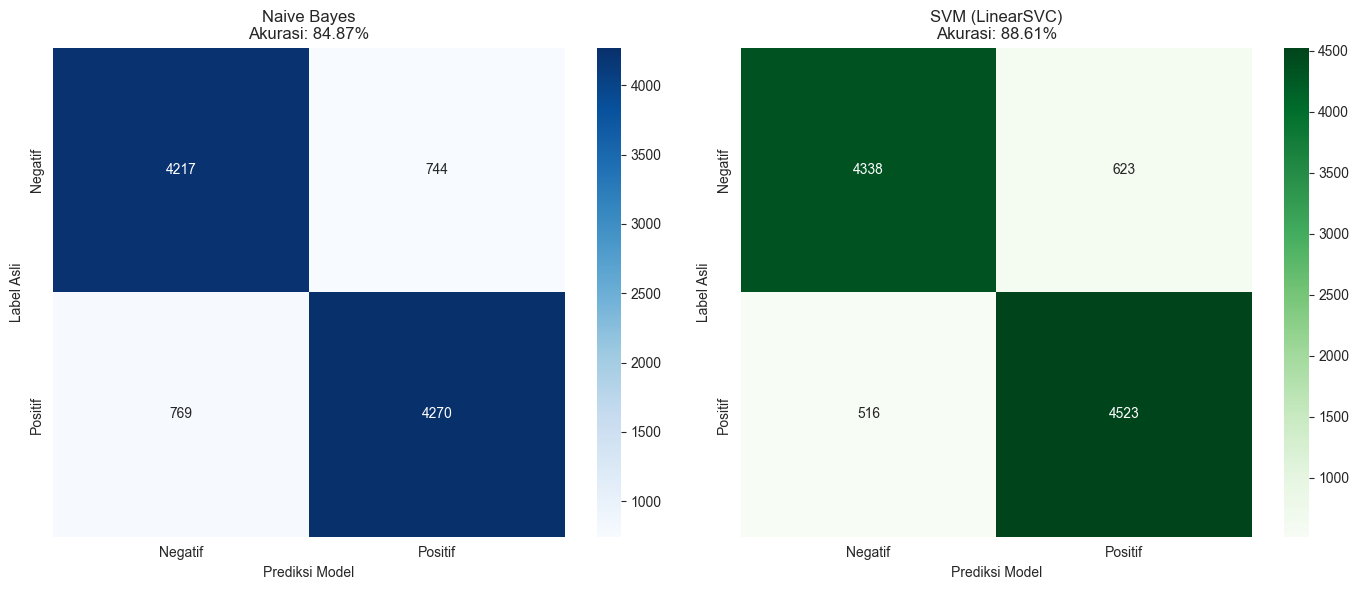

In [10]:
# Import library visualisasi (di-import ulang untuk memastikan cell ini mandiri)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Membuat DataFrame Perbandingan ---
komparasi = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM (LinearSVC)'],
    'Akurasi (%)': [nb_acc * 100, svm_acc * 100],
    'Waktu Training (detik)': [nb_train_time, svm_train_time],
    'Waktu Prediksi (detik)': [nb_pred_time, svm_pred_time]
})

print("TABEL PERBANDINGAN FINAL:")
display(komparasi)

# --- 2. Visualisasi Confusion Matrix Side-by-Side ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Heatmap Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title(f'Naive Bayes\nAkurasi: {nb_acc:.2%}')
ax[0].set_xlabel('Prediksi Model')
ax[0].set_ylabel('Label Asli')
ax[0].set_xticklabels(['Negatif', 'Positif'])
ax[0].set_yticklabels(['Negatif', 'Positif'])

# Plot Heatmap SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title(f'SVM (LinearSVC)\nAkurasi: {svm_acc:.2%}')
ax[1].set_xlabel('Prediksi Model')
ax[1].set_ylabel('Label Asli')
ax[1].set_xticklabels(['Negatif', 'Positif'])
ax[1].set_yticklabels(['Negatif', 'Positif'])

plt.tight_layout()
plt.show()

In [11]:
# Fungsi untuk prediksi sentimen dari input teks baru
def prediksi_ulasan(text):
    # 1. Bersihkan teks (gunakan fungsi clean_text yang sudah dibuat)
    clean = clean_text(text)
    
    # 2. Ubah ke angka (Transform pakai TF-IDF yang sudah dilatih)
    # PENTING: Pakai .transform(), JANGAN .fit_transform()
    text_vector = tfidf.transform([clean])
    
    # 3. Prediksi pakai model terbaik (SVM)
    pred_label = svm_model.predict(text_vector)[0]
    
    # 4. Terjemahkan 0/1 jadi kata-kata
    sentiment = "POSITIF" if pred_label == 1 else "NEGATIF"
    return sentiment

# --- Coba Ketik Ulasan Anda Sendiri di Sini ---
ulasan_baru = [
    "I absolutely loved this movie! The acting was incredible.", # Harusnya Positif
    "Total waste of time. The plot was boring and slow.",       # Harusnya Negatif
    "It was okay, not great but not terrible either.",          # Netral/Ambigu
    "The worst film I have ever seen in my entire life!"        # Sangat Negatif
]

print("--- HASIL PREDIKSI MODEL ---")
for ulasan in ulasan_baru:
    hasil = prediksi_ulasan(ulasan)
    print(f"Ulasan: '{ulasan}'")
    print(f"Prediksi: {hasil}\n")

--- HASIL PREDIKSI MODEL ---
Ulasan: 'I absolutely loved this movie! The acting was incredible.'
Prediksi: POSITIF

Ulasan: 'Total waste of time. The plot was boring and slow.'
Prediksi: NEGATIF

Ulasan: 'It was okay, not great but not terrible either.'
Prediksi: NEGATIF

Ulasan: 'The worst film I have ever seen in my entire life!'
Prediksi: NEGATIF



In [12]:
import joblib

# Simpan Vektorizer (Kamus kata)
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Simpan Model Naive Bayes
joblib.dump(nb_model, 'nb_model.pkl')

# Simpan Model SVM
joblib.dump(svm_model, 'svm_model.pkl')

print("Model berhasil disimpan! Cek folder proyek Anda.")

Model berhasil disimpan! Cek folder proyek Anda.
